The agency needs answers to several questions. The answers to those questions must be supported by data and analytics. These are their questions:

- Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?

- Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?

- Does the Complaint Type that you identified in response to question 1 have an obvious relationship with any particular characteristic or characteristics of the houses or buildings?

- Can a predictive model be built for a future prediction of the possibility of complaints of the type that you have identified in response to question 1?


Your organization has assigned you as the lead data scientist to provide the answers to these questions. You need to work on getting answers to them in this Capstone Project by following the standard approach of data science and machine learning.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

np.random.seed(0)
np.set_printoptions(suppress=True)

In [2]:
df = pd.read_csv("311.csv")

In [3]:
df

,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
0,0,45531130,02/02/2020 06:09:17 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10019.0,426 WEST 52 STREET,WEST 52 STREET,ADDRESS,NEW YORK,Open,The following complaint conditions are still o...,MANHATTAN,40.765132,-73.988993
1,1,45529784,02/02/2020 02:15:24 PM,NaN,UNSANITARY CONDITION,RESIDENTIAL BUILDING,11204.0,1751 67 STREET,67 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.618484,-73.992673
2,2,45527528,02/02/2020 02:27:41 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11372.0,87-15 37 AVENUE,37 AVENUE,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.750269,-73.879432
3,3,45530329,02/02/2020 12:13:18 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.853773,-73.881558
4,4,45528814,02/02/2020 01:59:44 PM,NaN,APPLIANCE,RESIDENTIAL BUILDING,11209.0,223 78 STREET,78 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.629745,-74.030533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019838,6019838,44063685,10/15/2019 10:35:45 AM,10/16/2019 05:55:02 PM,HEAT/HOT WATER,RESIDENTIAL BUILDING,10029.0,327 EAST 108 STREET,EAST 108 STREET,ADDRESS,NEW YORK,Closed,The complaint you filed is a duplicate of a co...,MANHATTAN,40.791359,-73.940184
6019839,6019839,44063692,10/15/2019 06:09:28 AM,10/15/2019 04:12:58 PM,HEAT/HOT WATER,RESIDENTIAL BUILDING,10461.0,3555 BRUCKNER BOULEVARD,BRUCKNER BOULEVARD,ADDRESS,BRONX,Closed,The Department of Housing Preservation and Dev...,BRONX,40.847809,-73.827481
6019840,6019840,44063724,10/15/2019 10:54:45 AM,10/16/2019 06:14:29 PM,HEAT/HOT WATER,RESIDENTIAL BUILDING,10034.0,165 SHERMAN AVENUE,SHERMAN AVENUE,ADDRESS,NEW YORK,Closed,The complaint you filed is a duplicate of a co...,MANHATTAN,40.864764,-73.922764
6019841,6019841,44063726,10/15/2019 02:07:34 PM,10/16/2019 07:10:19 PM,HEAT/HOT WATER,RESIDENTIAL BUILDING,10467.0,66 WEST GUN HILL ROAD,WEST GUN HILL ROAD,ADDRESS,BRONX,Closed,The Department of Housing Preservation and Dev...,BRONX,40.883207,-73.884279


In [4]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019843 entries, 0 to 6019842
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Unnamed: 0              6019843 non-null  int64  
 1   Unique Key              6019843 non-null  int64  
 2   Created Date            6019843 non-null  object 
 3   Closed Date             5893186 non-null  object 
 4   Complaint Type          6019843 non-null  object 
 5   Location Type           5967019 non-null  object 
 6   Incident Zip            5939146 non-null  float64
 7   Incident Address        5967018 non-null  object 
 8   Street Name             5967018 non-null  object 
 9   Address Type            5935078 non-null  object 
 10  City                    5939569 non-null  object 
 11  Status                  6019843 non-null  object 
 12  Resolution Description  6012017 non-null  object 
 13  Borough                 6019843 non-null  object 
 14  La

In [5]:
df.columns

Index(['Unnamed: 0', 'Unique Key', 'Created Date', 'Closed Date',
       'Complaint Type', 'Location Type', 'Incident Zip', 'Incident Address',
       'Street Name', 'Address Type', 'City', 'Status',
       'Resolution Description', 'Borough', 'Latitude', 'Longitude'],
      dtype='object')

In [6]:
df.drop(['Unnamed: 0','Closed Date','Location Type','Street Name','Address Type',
        'Resolution Description','Latitude', 'Longitude'],axis=1,inplace=True)

In [7]:
df

,Unique Key,Created Date,Complaint Type,Incident Zip,Incident Address,City,Status,Borough
0,45531130,02/02/2020 06:09:17 AM,HEAT/HOT WATER,10019.0,426 WEST 52 STREET,NEW YORK,Open,MANHATTAN
1,45529784,02/02/2020 02:15:24 PM,UNSANITARY CONDITION,11204.0,1751 67 STREET,BROOKLYN,Open,BROOKLYN
2,45527528,02/02/2020 02:27:41 AM,HEAT/HOT WATER,11372.0,87-15 37 AVENUE,Jackson Heights,Open,QUEENS
3,45530329,02/02/2020 12:13:18 PM,HEAT/HOT WATER,10458.0,2405 SOUTHERN BOULEVARD,BRONX,Open,BRONX
4,45528814,02/02/2020 01:59:44 PM,APPLIANCE,11209.0,223 78 STREET,BROOKLYN,Open,BROOKLYN
...,...,...,...,...,...,...,...,...
6019838,44063685,10/15/2019 10:35:45 AM,HEAT/HOT WATER,10029.0,327 EAST 108 STREET,NEW YORK,Closed,MANHATTAN
6019839,44063692,10/15/2019 06:09:28 AM,HEAT/HOT WATER,10461.0,3555 BRUCKNER BOULEVARD,BRONX,Closed,BRONX
6019840,44063724,10/15/2019 10:54:45 AM,HEAT/HOT WATER,10034.0,165 SHERMAN AVENUE,NEW YORK,Closed,MANHATTAN
6019841,44063726,10/15/2019 02:07:34 PM,HEAT/HOT WATER,10467.0,66 WEST GUN HILL ROAD,BRONX,Closed,BRONX


In [8]:
#df.to_csv("311mod.csv",index=False)

### Reload Modified Dataset

In [9]:
df = pd.read_csv("311mod.csv", na_values=np.nan)

In [10]:
df

,Unique Key,Created Date,Complaint Type,Incident Zip,Incident Address,City,Status,Borough
0,45531130,02/02/2020 06:09:17 AM,HEAT/HOT WATER,10019.0,426 WEST 52 STREET,NEW YORK,Open,MANHATTAN
1,45529784,02/02/2020 02:15:24 PM,UNSANITARY CONDITION,11204.0,1751 67 STREET,BROOKLYN,Open,BROOKLYN
2,45527528,02/02/2020 02:27:41 AM,HEAT/HOT WATER,11372.0,87-15 37 AVENUE,Jackson Heights,Open,QUEENS
3,45530329,02/02/2020 12:13:18 PM,HEAT/HOT WATER,10458.0,2405 SOUTHERN BOULEVARD,BRONX,Open,BRONX
4,45528814,02/02/2020 01:59:44 PM,APPLIANCE,11209.0,223 78 STREET,BROOKLYN,Open,BROOKLYN
...,...,...,...,...,...,...,...,...
6019838,44063685,10/15/2019 10:35:45 AM,HEAT/HOT WATER,10029.0,327 EAST 108 STREET,NEW YORK,Closed,MANHATTAN
6019839,44063692,10/15/2019 06:09:28 AM,HEAT/HOT WATER,10461.0,3555 BRUCKNER BOULEVARD,BRONX,Closed,BRONX
6019840,44063724,10/15/2019 10:54:45 AM,HEAT/HOT WATER,10034.0,165 SHERMAN AVENUE,NEW YORK,Closed,MANHATTAN
6019841,44063726,10/15/2019 02:07:34 PM,HEAT/HOT WATER,10467.0,66 WEST GUN HILL ROAD,BRONX,Closed,BRONX


### Exploratory Data Analysis

In [11]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019843 entries, 0 to 6019842
Data columns (total 8 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unique Key        6019843 non-null  int64  
 1   Created Date      6019843 non-null  object 
 2   Complaint Type    6019843 non-null  object 
 3   Incident Zip      5939146 non-null  float64
 4   Incident Address  5967018 non-null  object 
 5   City              5939569 non-null  object 
 6   Status            6019843 non-null  object 
 7   Borough           6019843 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 367.4+ MB


In [12]:
df.describe()

,Unique Key,Incident Zip
count,6.019843e+06,5.939146e+06
mean,2.956254e+07,1.074698e+04
std,7.909439e+06,5.130236e+02
min,1.562973e+07,1.000100e+04
25%,2.291225e+07,1.045200e+04
50%,2.931010e+07,1.046900e+04
75%,3.583163e+07,1.122300e+04
max,4.553204e+07,1.234500e+04


In [13]:
df.columns

Index(['Unique Key', 'Created Date', 'Complaint Type', 'Incident Zip',
       'Incident Address', 'City', 'Status', 'Borough'],
      dtype='object')

### What is the total number of complaints that exist in the dataset?

In [14]:
df.shape

(6019843, 8)

In [15]:
df["Unique Key"].nunique()

6019843

In [16]:
df["Created Date"].nunique()

1675132

### How many different Complain Types can you find in the dataset, including duplicates entries of the same type?

In [17]:
df["Complaint Type"].nunique()

30

In [18]:
df["Complaint Type"].unique()

array(['HEAT/HOT WATER', 'UNSANITARY CONDITION', 'APPLIANCE', 'GENERAL',
       'ELECTRIC', 'PLUMBING', 'PAINT/PLASTER', 'WATER LEAK', 'SAFETY',
       'DOOR/WINDOW', 'OUTSIDE BUILDING', 'ELEVATOR', 'FLOORING/STAIRS',
       'Unsanitary Condition', 'HPD Literature Request', 'HEATING',
       'PAINT - PLASTER', 'Safety', 'Electric', 'General', 'Appliance',
       'GENERAL CONSTRUCTION', 'NONCONST', 'CONSTRUCTION', 'AGENCY',
       'STRUCTURAL', 'VACANT APARTMENT', 'Outside Building', 'Plumbing',
       'Mold'], dtype=object)

In [19]:
df["Complaint Type"].value_counts()

HEAT/HOT WATER            1261574
HEATING                    887850
PLUMBING                   711130
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       451643
PAINT - PLASTER            361257
PAINT/PLASTER              346438
ELECTRIC                   307310
NONCONST                   260890
DOOR/WINDOW                205278
WATER LEAK                 193631
GENERAL                    151308
FLOORING/STAIRS            137402
APPLIANCE                  112831
HPD Literature Request      52824
SAFETY                      51529
OUTSIDE BUILDING             7142
ELEVATOR                     6725
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
Outside Building                6
VACANT APARTMENT                6
Appliance                       4
Mold                            1
Electric      

In [20]:
df["Incident Zip"].nunique()

202

### Cardinality check for incident address (The cardinality of the data in PLUTO dataset is at the same level as the complaint dataset?)

In [21]:
df["Incident Address"].nunique()

182600

In [22]:
df["City"].nunique()

89

In [23]:
df["Status"].nunique()

5

In [24]:
df["Status"].value_counts()

Closed         5886253
Open            133220
In Progress        364
Assigned             4
Pending              2
Name: Status, dtype: int64

In [25]:
df["Borough"].nunique()

6

### Data Visualization

### Univariate Data Exploration

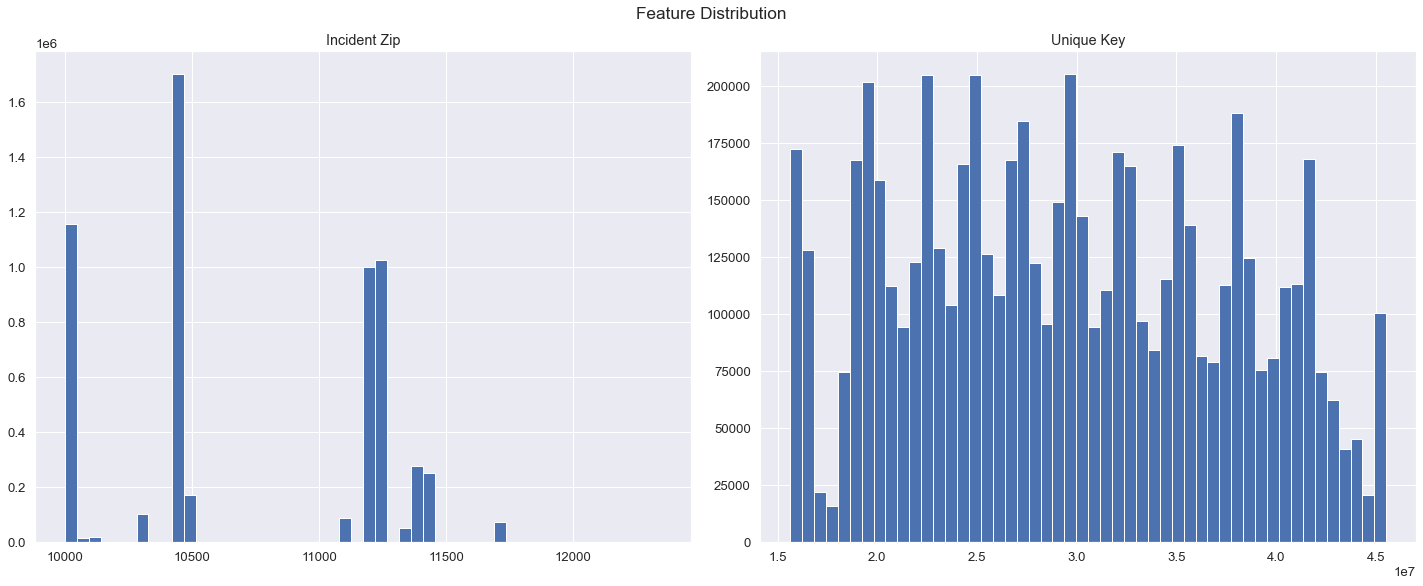

In [26]:
df.hist(bins=50, figsize=(20,8))

plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')

plt.tight_layout()

plt.show()

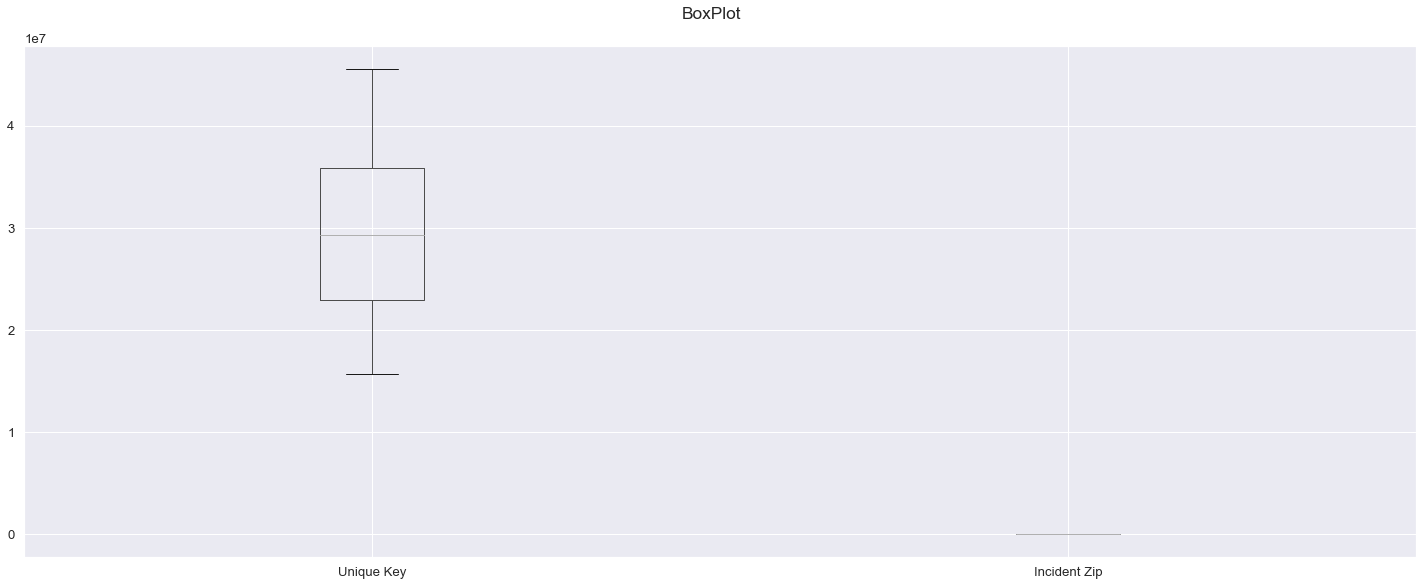

In [27]:
df.boxplot(figsize=(20,8))

plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')

plt.tight_layout()

plt.show()

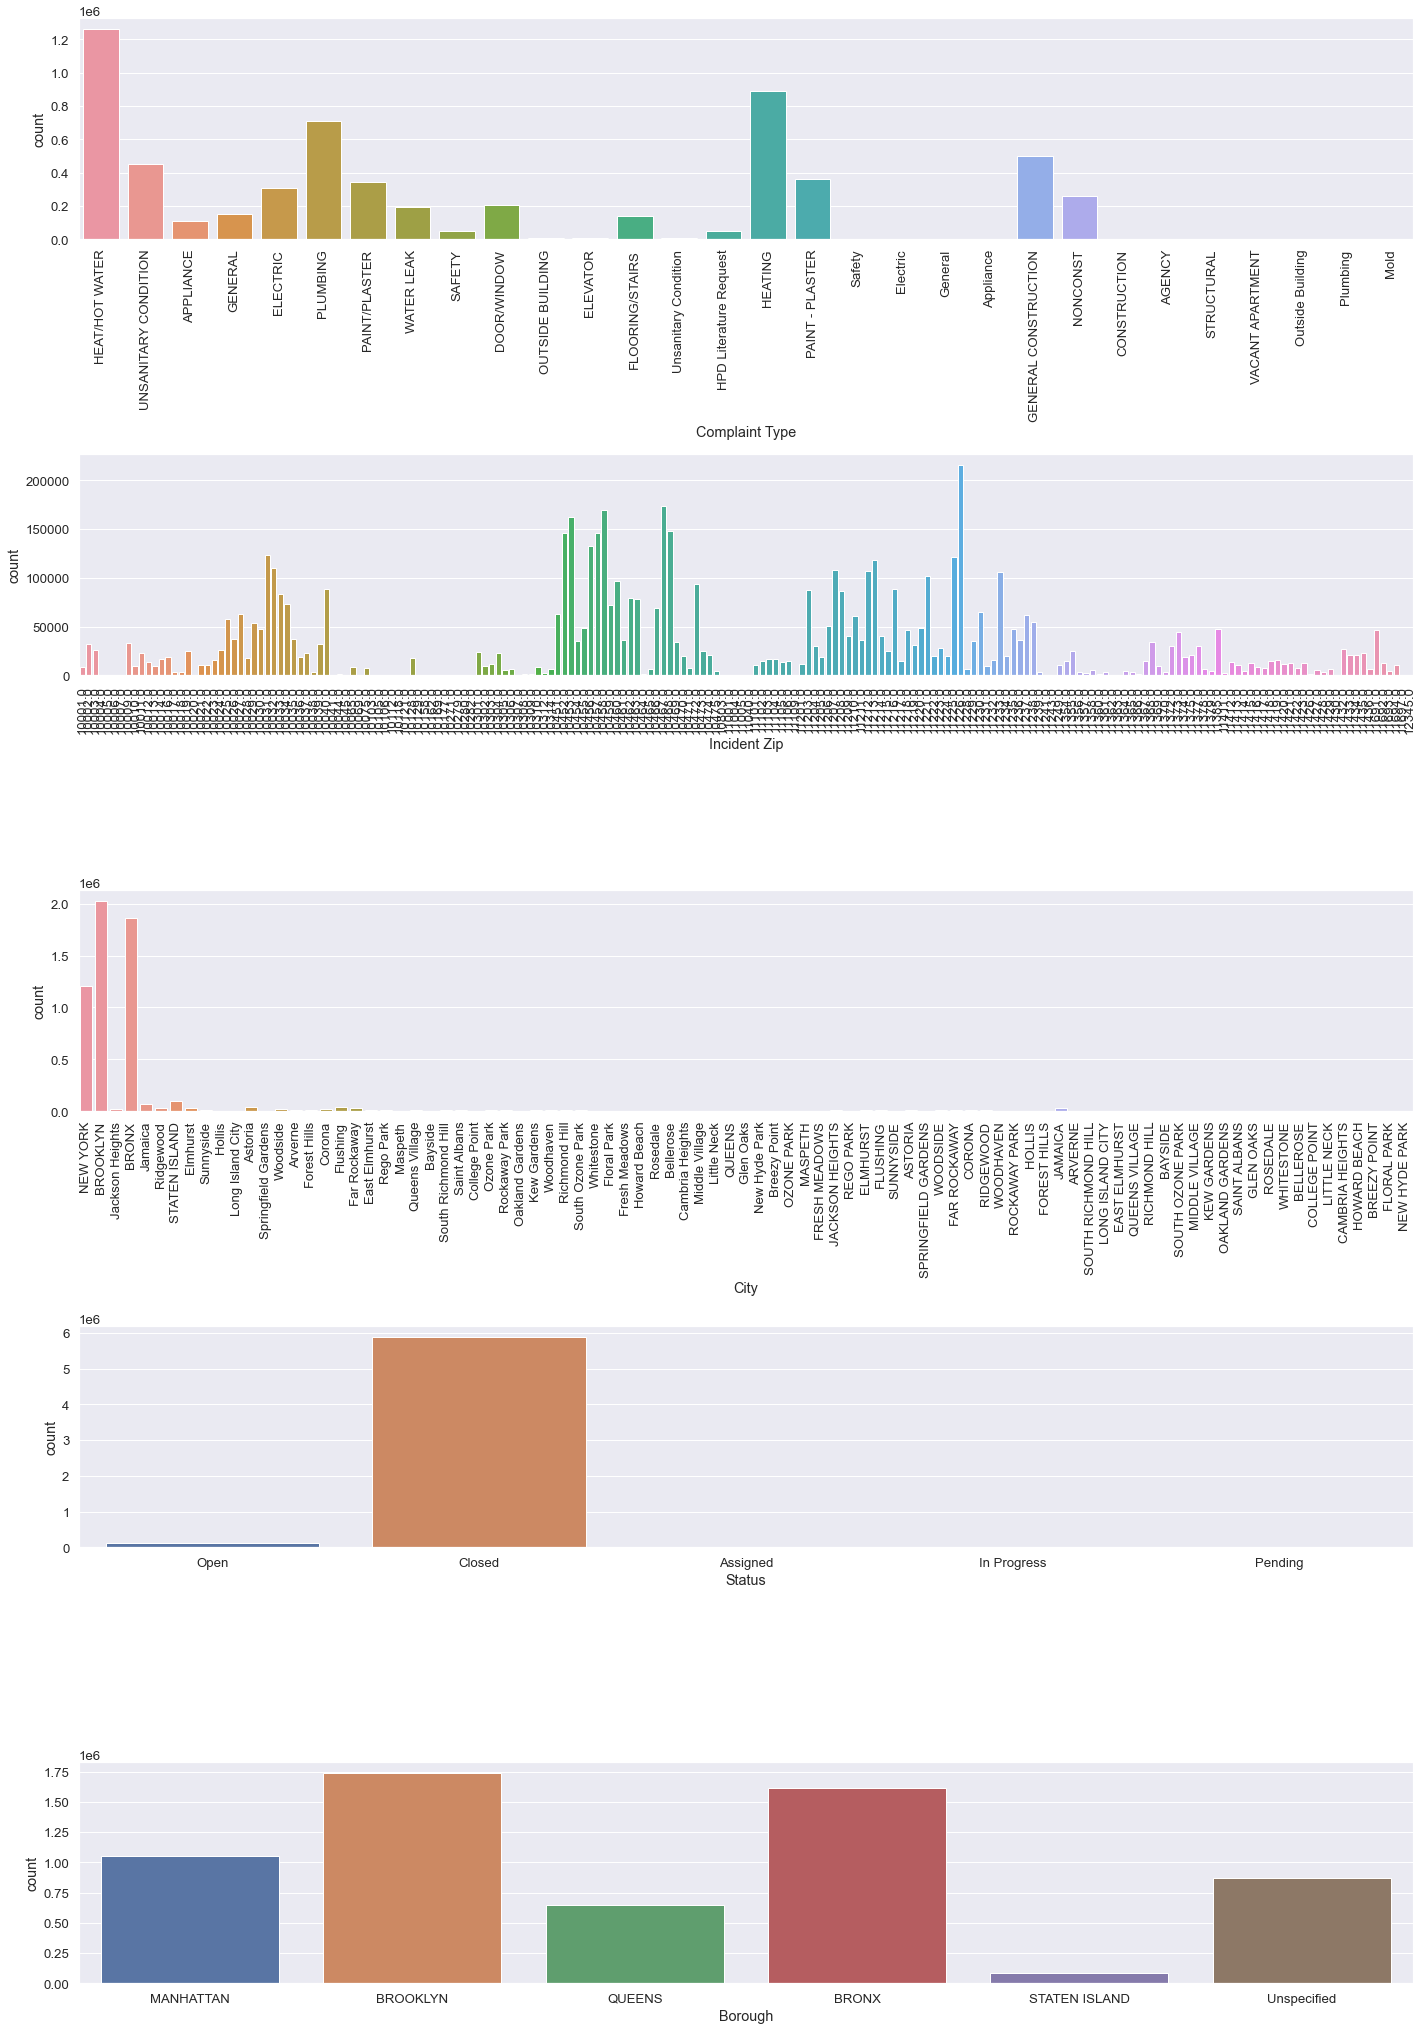

In [28]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,1,1)
plt.title("")
plt.xticks(rotation=90)
sns.countplot(x='Complaint Type', data=df)

plt.subplot(7,1,2)
plt.title("")
plt.xticks(rotation=90)
sns.countplot(x='Incident Zip', data=df)

plt.subplot(7,1,3)
plt.title("")
plt.xticks(rotation=90)
sns.countplot(x='City', data=df)

plt.subplot(7,1,4)
plt.title("")
sns.countplot(x='Status', data=df)

plt.subplot(7,1,5)
plt.title("")
sns.countplot(x='Borough', data=df)

plt.tight_layout()
plt.show()

In [29]:
# plt.figure(figsize=(20,20))
# plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize='large')
# sns.pairplot(df.sample(500))
# plt.show()

### The dataset contains complaints logged since what date?

In [30]:
df["Created Date"].sort_values()

177182    01/01/2010 02:31:13 PM
177179    01/01/2010 02:39:02 PM
177186    01/01/2010 04:18:46 PM
177188    01/01/2010 04:59:23 PM
177180    01/01/2010 05:00:01 AM
                   ...          
62668     12/31/2019 12:57:51 AM
76629     12/31/2019 12:58:50 PM
6410      12/31/2019 12:59:01 PM
6764      12/31/2019 12:59:06 PM
76613     12/31/2019 12:59:12 PM
Name: Created Date, Length: 6019843, dtype: object

In [31]:
df.sort_values(by="Unique Key")

,Unique Key,Created Date,Complaint Type,Incident Zip,Incident Address,City,Status,Borough
250933,15629728,01/01/2010 12:00:00 AM,HEATING,11210.0,3101 FOSTER AVENUE,BROOKLYN,Closed,Unspecified
250934,15629899,01/01/2010 12:00:00 AM,PLUMBING,11106.0,31-54 29 STREET,ASTORIA,Closed,Unspecified
250935,15630099,01/01/2010 12:00:00 AM,HEATING,10466.0,1405 EAST 233 STREET,BRONX,Closed,Unspecified
250936,15630315,01/01/2010 12:00:00 AM,PLUMBING,11106.0,31-54 29 STREET,ASTORIA,Closed,Unspecified
250937,15630431,01/01/2010 12:00:00 AM,HEATING,11226.0,22 MARTENSE STREET,BROOKLYN,Closed,Unspecified
...,...,...,...,...,...,...,...,...
336,45532039,02/02/2020 02:09:33 PM,HEAT/HOT WATER,11235.0,2750 HOMECREST AVENUE,BROOKLYN,Open,BROOKLYN
76,45532040,02/02/2020 11:37:42 PM,HEAT/HOT WATER,11214.0,8301 BAY PARKWAY,BROOKLYN,Open,BROOKLYN
561,45532041,02/02/2020 04:15:59 PM,HEAT/HOT WATER,10031.0,3675 BROADWAY,NEW YORK,Open,MANHATTAN
316,45532042,02/02/2020 05:57:23 PM,HEAT/HOT WATER,10452.0,1441 EDWARD L GRANT HIGHWAY,BRONX,Open,BRONX


### What is the total number of complaints that exist in the dataset?

In [32]:
df["Complaint Type"].describe()

count            6019843
unique                30
top       HEAT/HOT WATER
freq             1261574
Name: Complaint Type, dtype: object

### How many HEATING complaints are with the closed status

In [33]:
df["Status"].value_counts()

Closed         5886253
Open            133220
In Progress        364
Assigned             4
Pending              2
Name: Status, dtype: int64

In [34]:
closedcases = df[df["Status"] == "Closed"]

In [35]:
closedcases

,Unique Key,Created Date,Complaint Type,Incident Zip,Incident Address,City,Status,Borough
33,45530303,02/02/2020 08:24:04 AM,HEAT/HOT WATER,10457.0,2176 TIEBOUT AVENUE,BRONX,Closed,BRONX
82,45527549,02/02/2020 07:49:04 AM,HEAT/HOT WATER,11203.0,676 MIDWOOD STREET,BROOKLYN,Closed,BROOKLYN
85,45529809,02/02/2020 12:09:59 PM,HEAT/HOT WATER,10457.0,2176 TIEBOUT AVENUE,BRONX,Closed,BRONX
168,45531280,02/02/2020 04:55:26 PM,HEAT/HOT WATER,10457.0,2176 TIEBOUT AVENUE,BRONX,Closed,BRONX
179,45528906,02/02/2020 04:12:50 PM,HEAT/HOT WATER,11210.0,837 EAST 22 STREET,BROOKLYN,Closed,BROOKLYN
...,...,...,...,...,...,...,...,...
6019838,44063685,10/15/2019 10:35:45 AM,HEAT/HOT WATER,10029.0,327 EAST 108 STREET,NEW YORK,Closed,MANHATTAN
6019839,44063692,10/15/2019 06:09:28 AM,HEAT/HOT WATER,10461.0,3555 BRUCKNER BOULEVARD,BRONX,Closed,BRONX
6019840,44063724,10/15/2019 10:54:45 AM,HEAT/HOT WATER,10034.0,165 SHERMAN AVENUE,NEW YORK,Closed,MANHATTAN
6019841,44063726,10/15/2019 02:07:34 PM,HEAT/HOT WATER,10467.0,66 WEST GUN HILL ROAD,BRONX,Closed,BRONX


In [36]:
closedcases['Complaint Type'].unique()

array(['HEAT/HOT WATER', 'WATER LEAK', 'ELECTRIC', 'UNSANITARY CONDITION',
       'PAINT/PLASTER', 'APPLIANCE', 'SAFETY', 'FLOORING/STAIRS',
       'DOOR/WINDOW', 'PLUMBING', 'GENERAL', 'OUTSIDE BUILDING',
       'ELEVATOR', 'Unsanitary Condition', 'HPD Literature Request',
       'HEATING', 'Safety', 'Electric', 'General', 'Appliance',
       'PAINT - PLASTER', 'GENERAL CONSTRUCTION', 'NONCONST',
       'CONSTRUCTION', 'AGENCY', 'STRUCTURAL', 'VACANT APARTMENT',
       'Outside Building', 'Plumbing'], dtype=object)

In [37]:
closedcases['Complaint Type'].value_counts()

HEAT/HOT WATER            1256876
HEATING                    876455
PLUMBING                   685071
GENERAL CONSTRUCTION       471240
UNSANITARY CONDITION       448141
PAINT/PLASTER              344807
PAINT - PLASTER            339610
ELECTRIC                   298082
NONCONST                   245612
DOOR/WINDOW                204059
WATER LEAK                 192289
GENERAL                    150053
FLOORING/STAIRS            136595
APPLIANCE                  109058
HPD Literature Request      51744
SAFETY                      51261
OUTSIDE BUILDING             7086
ELEVATOR                     6631
Unsanitary Condition         5253
CONSTRUCTION                 4812
General                      1067
Safety                        405
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
Outside Building                6
Appliance                       2
VACANT APARTMENT                1
Electric                        1
Name: Complain

In [38]:
print('Closed heat cases =',1256876 + 876455)

Closed heat cases = 2133331


### What does it mean for the ZipCode to be valid?

In [39]:
df["Incident Zip"].unique()

array([10019., 11204., 11372., 10458., 11209., 10456., 11226., 11230.,
       11207., 10459., 10039., 11433., 11238., 10011., 10026., 10031.,
       10473., 11210., 10457., 11216., 10014., 10034., 11203., 10463.,
       10462., 10460., 11385., 11219., 10036., 10302., 11373., 11229.,
       11233., 11104., 10453., 11235., 10471., 10468., 11217., 10466.,
       10024., 10027., 10452., 11214., 11212., 10451., 11225., 10025.,
       11213., 11221., 11218., 10033., 11423., 11101., 11223., 10035.,
       10461., 10016., 10040., 11102., 11237., 10467., 11231., 11413.,
       11377., 10469., 11236., 11692., 10029., 11375., 10472., 11208.,
       11211., 11368., 11354., 11691., 10032., 10023., 10002., 10307.,
       11369., 10454., 10304., 10128., 11434., 10470., 11374., 11355.,
       10455., 10309., 11228., 10022., 10028., 11435., 11378., 11427.,
       10030., 10037., 11432., 10003., 10075., 10009., 11232., 11201.,
       11361., 11419., 10010., 10314., 11224., 11106., 11412., 11356.,
      

In [40]:
df["Incident Zip"].nunique()

202

### How many Electric complaints can you find in the dataset?

In [41]:
df["Complaint Type"].unique()

array(['HEAT/HOT WATER', 'UNSANITARY CONDITION', 'APPLIANCE', 'GENERAL',
       'ELECTRIC', 'PLUMBING', 'PAINT/PLASTER', 'WATER LEAK', 'SAFETY',
       'DOOR/WINDOW', 'OUTSIDE BUILDING', 'ELEVATOR', 'FLOORING/STAIRS',
       'Unsanitary Condition', 'HPD Literature Request', 'HEATING',
       'PAINT - PLASTER', 'Safety', 'Electric', 'General', 'Appliance',
       'GENERAL CONSTRUCTION', 'NONCONST', 'CONSTRUCTION', 'AGENCY',
       'STRUCTURAL', 'VACANT APARTMENT', 'Outside Building', 'Plumbing',
       'Mold'], dtype=object)

In [42]:
df["Complaint Type"].value_counts()

HEAT/HOT WATER            1261574
HEATING                    887850
PLUMBING                   711130
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       451643
PAINT - PLASTER            361257
PAINT/PLASTER              346438
ELECTRIC                   307310
NONCONST                   260890
DOOR/WINDOW                205278
WATER LEAK                 193631
GENERAL                    151308
FLOORING/STAIRS            137402
APPLIANCE                  112831
HPD Literature Request      52824
SAFETY                      51529
OUTSIDE BUILDING             7142
ELEVATOR                     6725
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
Outside Building                6
VACANT APARTMENT                6
Appliance                       4
Mold                            1
Electric      

In [43]:
print('Electric counts =', 307310 + 1)

Electric counts = 307311


### Using 80000 as a threshold, what complaint types do you recommend Dept of Housing Preservation and Development of New York CIty address first?

In [44]:
newyorkcity = df[df["City"] == "NEW YORK"]

In [45]:
newyorkcity

,Unique Key,Created Date,Complaint Type,Incident Zip,Incident Address,City,Status,Borough
0,45531130,02/02/2020 06:09:17 AM,HEAT/HOT WATER,10019.0,426 WEST 52 STREET,NEW YORK,Open,MANHATTAN
11,45530831,02/02/2020 10:13:57 AM,HEAT/HOT WATER,10039.0,2819 FREDERICK DOUGLASS BOULEVARD,NEW YORK,Open,MANHATTAN
15,45530802,02/02/2020 03:50:43 PM,HEAT/HOT WATER,10011.0,334 WEST 22 STREET,NEW YORK,Open,MANHATTAN
17,45528911,02/02/2020 04:32:03 AM,HEAT/HOT WATER,10026.0,225 CENTRAL PARK NORTH,NEW YORK,Open,MANHATTAN
18,45528877,02/02/2020 11:10:08 AM,HEAT/HOT WATER,10031.0,529 WEST 151 STREET,NEW YORK,Open,MANHATTAN
...,...,...,...,...,...,...,...,...
6019828,44063636,10/15/2019 08:03:00 AM,HEAT/HOT WATER,10036.0,510 WEST 45 STREET,NEW YORK,Closed,MANHATTAN
6019836,44063680,10/15/2019 06:43:56 PM,HEAT/HOT WATER,10029.0,327 EAST 108 STREET,NEW YORK,Closed,MANHATTAN
6019838,44063685,10/15/2019 10:35:45 AM,HEAT/HOT WATER,10029.0,327 EAST 108 STREET,NEW YORK,Closed,MANHATTAN
6019840,44063724,10/15/2019 10:54:45 AM,HEAT/HOT WATER,10034.0,165 SHERMAN AVENUE,NEW YORK,Closed,MANHATTAN


In [46]:
newyorkcity["Complaint Type"].value_counts()

HEAT/HOT WATER          283610
HEATING                 193908
PLUMBING                134366
GENERAL CONSTRUCTION     88549
UNSANITARY CONDITION     85242
PAINT/PLASTER            71335
PAINT - PLASTER          65710
ELECTRIC                 51140
NONCONST                 44930
GENERAL                  41994
DOOR/WINDOW              41221
WATER LEAK               36699
FLOORING/STAIRS          30398
APPLIANCE                20463
SAFETY                    9390
ELEVATOR                  1674
OUTSIDE BUILDING          1462
Unsanitary Condition      1025
CONSTRUCTION               935
General                    289
Safety                      65
VACANT APARTMENT             4
STRUCTURAL                   3
Plumbing                     2
AGENCY                       2
Electric                     1
Name: Complaint Type, dtype: int64

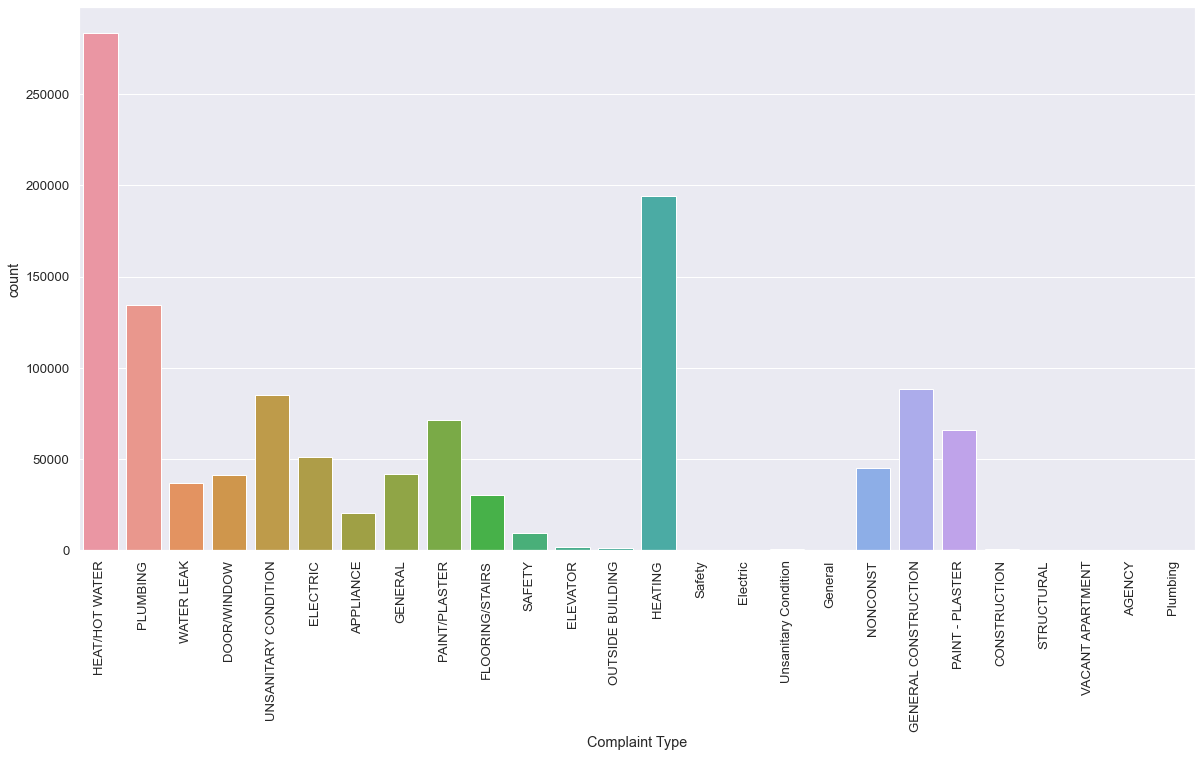

In [47]:
fig = plt.figure(figsize=(20,10))
sns.countplot(x=newyorkcity["Complaint Type"])
plt.xticks(rotation=90)
plt.show()

### For the complaint types that you selected in the previous module that had at least 80,000 complaints logged, which address had the highest number of complainted submitted?

In [48]:
newyorkcity

,Unique Key,Created Date,Complaint Type,Incident Zip,Incident Address,City,Status,Borough
0,45531130,02/02/2020 06:09:17 AM,HEAT/HOT WATER,10019.0,426 WEST 52 STREET,NEW YORK,Open,MANHATTAN
11,45530831,02/02/2020 10:13:57 AM,HEAT/HOT WATER,10039.0,2819 FREDERICK DOUGLASS BOULEVARD,NEW YORK,Open,MANHATTAN
15,45530802,02/02/2020 03:50:43 PM,HEAT/HOT WATER,10011.0,334 WEST 22 STREET,NEW YORK,Open,MANHATTAN
17,45528911,02/02/2020 04:32:03 AM,HEAT/HOT WATER,10026.0,225 CENTRAL PARK NORTH,NEW YORK,Open,MANHATTAN
18,45528877,02/02/2020 11:10:08 AM,HEAT/HOT WATER,10031.0,529 WEST 151 STREET,NEW YORK,Open,MANHATTAN
...,...,...,...,...,...,...,...,...
6019828,44063636,10/15/2019 08:03:00 AM,HEAT/HOT WATER,10036.0,510 WEST 45 STREET,NEW YORK,Closed,MANHATTAN
6019836,44063680,10/15/2019 06:43:56 PM,HEAT/HOT WATER,10029.0,327 EAST 108 STREET,NEW YORK,Closed,MANHATTAN
6019838,44063685,10/15/2019 10:35:45 AM,HEAT/HOT WATER,10029.0,327 EAST 108 STREET,NEW YORK,Closed,MANHATTAN
6019840,44063724,10/15/2019 10:54:45 AM,HEAT/HOT WATER,10034.0,165 SHERMAN AVENUE,NEW YORK,Closed,MANHATTAN


In [49]:
newyorkcity["Complaint Type"] = newyorkcity["Complaint Type"].replace(to_replace="HEATING",value="HEAT/HOT WATER")

In [50]:
newyorkcity["Complaint Type"].value_counts()

HEAT/HOT WATER          477518
PLUMBING                134366
GENERAL CONSTRUCTION     88549
UNSANITARY CONDITION     85242
PAINT/PLASTER            71335
PAINT - PLASTER          65710
ELECTRIC                 51140
NONCONST                 44930
GENERAL                  41994
DOOR/WINDOW              41221
WATER LEAK               36699
FLOORING/STAIRS          30398
APPLIANCE                20463
SAFETY                    9390
ELEVATOR                  1674
OUTSIDE BUILDING          1462
Unsanitary Condition      1025
CONSTRUCTION               935
General                    289
Safety                      65
VACANT APARTMENT             4
STRUCTURAL                   3
Plumbing                     2
AGENCY                       2
Electric                     1
Name: Complaint Type, dtype: int64

# Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?

## Answer: HEAT/HOT WATER

In [51]:
nycheat = newyorkcity[newyorkcity["Complaint Type"] == "HEAT/HOT WATER"]

In [52]:
nycheat

,Unique Key,Created Date,Complaint Type,Incident Zip,Incident Address,City,Status,Borough
0,45531130,02/02/2020 06:09:17 AM,HEAT/HOT WATER,10019.0,426 WEST 52 STREET,NEW YORK,Open,MANHATTAN
11,45530831,02/02/2020 10:13:57 AM,HEAT/HOT WATER,10039.0,2819 FREDERICK DOUGLASS BOULEVARD,NEW YORK,Open,MANHATTAN
15,45530802,02/02/2020 03:50:43 PM,HEAT/HOT WATER,10011.0,334 WEST 22 STREET,NEW YORK,Open,MANHATTAN
17,45528911,02/02/2020 04:32:03 AM,HEAT/HOT WATER,10026.0,225 CENTRAL PARK NORTH,NEW YORK,Open,MANHATTAN
18,45528877,02/02/2020 11:10:08 AM,HEAT/HOT WATER,10031.0,529 WEST 151 STREET,NEW YORK,Open,MANHATTAN
...,...,...,...,...,...,...,...,...
6019826,44063628,10/15/2019 06:18:33 PM,HEAT/HOT WATER,10024.0,2301 BROADWAY,NEW YORK,Closed,MANHATTAN
6019828,44063636,10/15/2019 08:03:00 AM,HEAT/HOT WATER,10036.0,510 WEST 45 STREET,NEW YORK,Closed,MANHATTAN
6019836,44063680,10/15/2019 06:43:56 PM,HEAT/HOT WATER,10029.0,327 EAST 108 STREET,NEW YORK,Closed,MANHATTAN
6019838,44063685,10/15/2019 10:35:45 AM,HEAT/HOT WATER,10029.0,327 EAST 108 STREET,NEW YORK,Closed,MANHATTAN


In [53]:
nycheat["Incident Address"].value_counts()

34 ARDEN STREET                 13626
97 SHERMAN AVENUE                2540
644 RIVERSIDE DRIVE              1411
41 TIEMANN PLACE                 1179
2300 5 AVENUE                    1176
                                ...  
164 EAST 100 STREET                 1
236 EAST 88 STREET                  1
41 WEST 35 STREET                   1
61 WEST 89 STREET                   1
2380 ADAM C POWELL BOULEVARD        1
Name: Incident Address, Length: 25310, dtype: int64

### For the complaint types that you selected in the previous module that had at least 80,000 complaints logged, which borough had the highest number of complaints submitted?

In [54]:
newyorkcity

,Unique Key,Created Date,Complaint Type,Incident Zip,Incident Address,City,Status,Borough
0,45531130,02/02/2020 06:09:17 AM,HEAT/HOT WATER,10019.0,426 WEST 52 STREET,NEW YORK,Open,MANHATTAN
11,45530831,02/02/2020 10:13:57 AM,HEAT/HOT WATER,10039.0,2819 FREDERICK DOUGLASS BOULEVARD,NEW YORK,Open,MANHATTAN
15,45530802,02/02/2020 03:50:43 PM,HEAT/HOT WATER,10011.0,334 WEST 22 STREET,NEW YORK,Open,MANHATTAN
17,45528911,02/02/2020 04:32:03 AM,HEAT/HOT WATER,10026.0,225 CENTRAL PARK NORTH,NEW YORK,Open,MANHATTAN
18,45528877,02/02/2020 11:10:08 AM,HEAT/HOT WATER,10031.0,529 WEST 151 STREET,NEW YORK,Open,MANHATTAN
...,...,...,...,...,...,...,...,...
6019828,44063636,10/15/2019 08:03:00 AM,HEAT/HOT WATER,10036.0,510 WEST 45 STREET,NEW YORK,Closed,MANHATTAN
6019836,44063680,10/15/2019 06:43:56 PM,HEAT/HOT WATER,10029.0,327 EAST 108 STREET,NEW YORK,Closed,MANHATTAN
6019838,44063685,10/15/2019 10:35:45 AM,HEAT/HOT WATER,10029.0,327 EAST 108 STREET,NEW YORK,Closed,MANHATTAN
6019840,44063724,10/15/2019 10:54:45 AM,HEAT/HOT WATER,10034.0,165 SHERMAN AVENUE,NEW YORK,Closed,MANHATTAN


In [55]:
df3 = newyorkcity[(newyorkcity["Complaint Type"] == "HEAT/HOT WATER") | (newyorkcity["Complaint Type"] == "PLUMBING") | (newyorkcity["Complaint Type"] == "GENERAL CONSTRUCTION") | (newyorkcity["Complaint Type"] == "UNSANITARY CONDITION")]

In [56]:
df3

,Unique Key,Created Date,Complaint Type,Incident Zip,Incident Address,City,Status,Borough
0,45531130,02/02/2020 06:09:17 AM,HEAT/HOT WATER,10019.0,426 WEST 52 STREET,NEW YORK,Open,MANHATTAN
11,45530831,02/02/2020 10:13:57 AM,HEAT/HOT WATER,10039.0,2819 FREDERICK DOUGLASS BOULEVARD,NEW YORK,Open,MANHATTAN
15,45530802,02/02/2020 03:50:43 PM,HEAT/HOT WATER,10011.0,334 WEST 22 STREET,NEW YORK,Open,MANHATTAN
17,45528911,02/02/2020 04:32:03 AM,HEAT/HOT WATER,10026.0,225 CENTRAL PARK NORTH,NEW YORK,Open,MANHATTAN
18,45528877,02/02/2020 11:10:08 AM,HEAT/HOT WATER,10031.0,529 WEST 151 STREET,NEW YORK,Open,MANHATTAN
...,...,...,...,...,...,...,...,...
6019826,44063628,10/15/2019 06:18:33 PM,HEAT/HOT WATER,10024.0,2301 BROADWAY,NEW YORK,Closed,MANHATTAN
6019828,44063636,10/15/2019 08:03:00 AM,HEAT/HOT WATER,10036.0,510 WEST 45 STREET,NEW YORK,Closed,MANHATTAN
6019836,44063680,10/15/2019 06:43:56 PM,HEAT/HOT WATER,10029.0,327 EAST 108 STREET,NEW YORK,Closed,MANHATTAN
6019838,44063685,10/15/2019 10:35:45 AM,HEAT/HOT WATER,10029.0,327 EAST 108 STREET,NEW YORK,Closed,MANHATTAN


In [57]:
df3["Complaint Type"].unique()

array(['HEAT/HOT WATER', 'PLUMBING', 'UNSANITARY CONDITION',
       'GENERAL CONSTRUCTION'], dtype=object)

In [58]:
df3["Borough"].unique()

array(['MANHATTAN', 'Unspecified'], dtype=object)

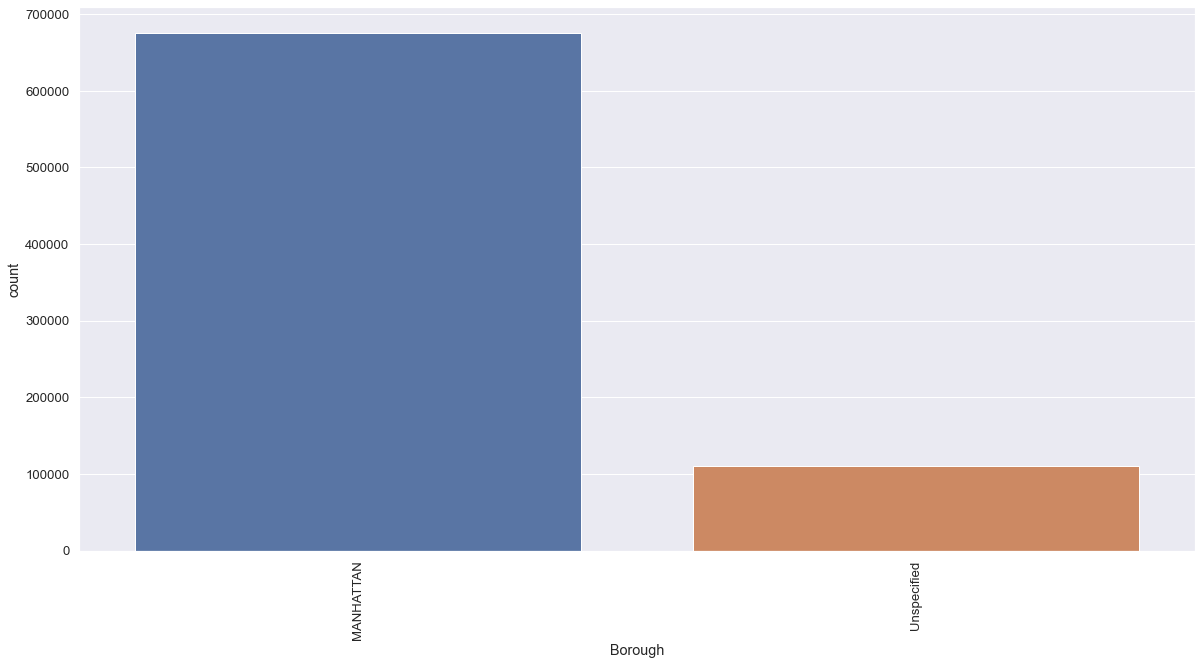

In [59]:
fig = plt.figure(figsize=(20,10))
sns.countplot(x=df3["Borough"])
plt.xticks(rotation=90)
plt.show()

### If HEAT/HOT WATER ONLY:

In [60]:
nycheat

,Unique Key,Created Date,Complaint Type,Incident Zip,Incident Address,City,Status,Borough
0,45531130,02/02/2020 06:09:17 AM,HEAT/HOT WATER,10019.0,426 WEST 52 STREET,NEW YORK,Open,MANHATTAN
11,45530831,02/02/2020 10:13:57 AM,HEAT/HOT WATER,10039.0,2819 FREDERICK DOUGLASS BOULEVARD,NEW YORK,Open,MANHATTAN
15,45530802,02/02/2020 03:50:43 PM,HEAT/HOT WATER,10011.0,334 WEST 22 STREET,NEW YORK,Open,MANHATTAN
17,45528911,02/02/2020 04:32:03 AM,HEAT/HOT WATER,10026.0,225 CENTRAL PARK NORTH,NEW YORK,Open,MANHATTAN
18,45528877,02/02/2020 11:10:08 AM,HEAT/HOT WATER,10031.0,529 WEST 151 STREET,NEW YORK,Open,MANHATTAN
...,...,...,...,...,...,...,...,...
6019826,44063628,10/15/2019 06:18:33 PM,HEAT/HOT WATER,10024.0,2301 BROADWAY,NEW YORK,Closed,MANHATTAN
6019828,44063636,10/15/2019 08:03:00 AM,HEAT/HOT WATER,10036.0,510 WEST 45 STREET,NEW YORK,Closed,MANHATTAN
6019836,44063680,10/15/2019 06:43:56 PM,HEAT/HOT WATER,10029.0,327 EAST 108 STREET,NEW YORK,Closed,MANHATTAN
6019838,44063685,10/15/2019 10:35:45 AM,HEAT/HOT WATER,10029.0,327 EAST 108 STREET,NEW YORK,Closed,MANHATTAN


In [61]:
nycheat["Borough"].unique()

array(['MANHATTAN', 'Unspecified'], dtype=object)

### Correlation

In [62]:
df.corr()

,Unique Key,Incident Zip
Unique Key,1.000000,-0.030457
Incident Zip,-0.030457,1.000000


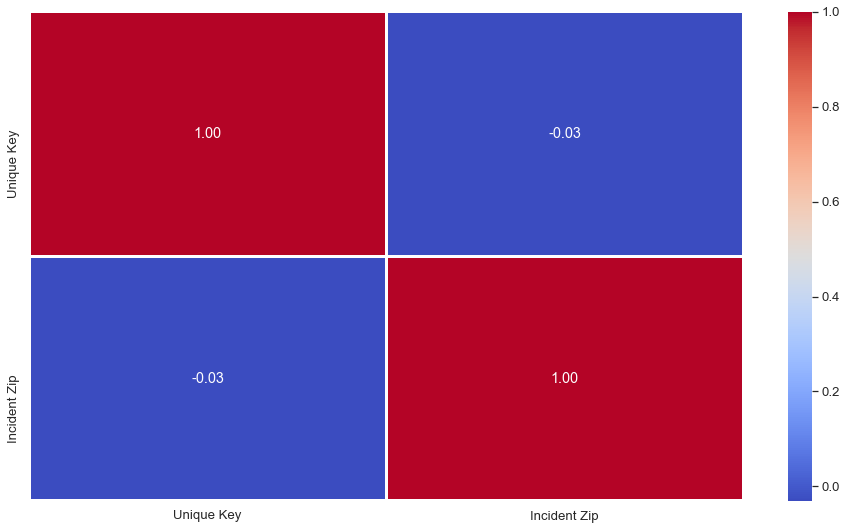

In [63]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()